# Chapter 2. 데이터와 표본분포

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.utils import resample

path = 'c:/reposit/data/book/practicalstatistics/'

In [2]:
# 데이터 불러오기
# loans_income = pd.read_csv(path + 'loans_income.csv', squeeze=True)
loans_income = pd.read_csv(path + 'loans_income.csv').squeeze()
nflx = pd.read_csv(path + 'sp500_data.csv.gz').NFLX

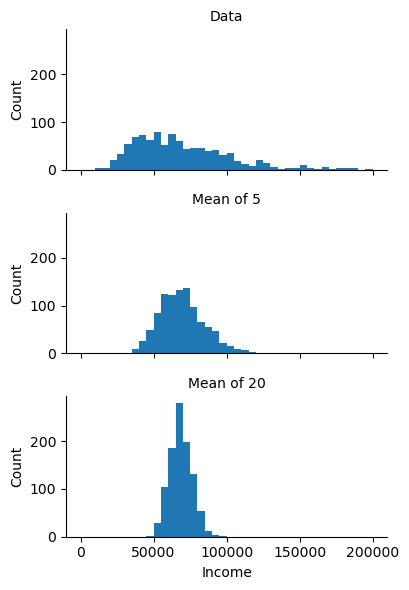

In [3]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data'
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.show()

## 2.4 부트스트랩

In [4]:
# 부트스트랩
results = []

for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())

results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.median() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: 0.0
std. error: 212.17516716456575


In [5]:
# 부트스트랩 파이썬으로 구핸해보기
# 원래 데이터 샘플
original_data = np.array([23, 45, 56, 12, 9, 38, 56, 48, 20, 8])

# 부트스트랩 샘플을 위한 반복 횟수
n_bootstrap_samples = 1000

# 부트스트랩 샘플의 평균을 저장할 리스트
bootstrap_means = []

for _ in range(n_bootstrap_samples):
    # 복원 추출로 부트스트랩 샘플 생성
    bootstrap_sample = np.random.choice(original_data, size=len(original_data), replace=True)
    
    # 부트스트랩 샘플의 평균 계산
    bootstrap_mean = np.mean(bootstrap_sample)
    
    # 계산한 평균을 리스트에 저장
    bootstrap_means.append(bootstrap_mean)

# 부트스트랩으로 얻은 평균의 분포에서 신뢰구간 계산
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"원래 데이터 샘플의 평균: {np.mean(original_data):.2f}")
print(f"부트스트랩 평균의 95% 신뢰구간: ({lower_bound:.2f}, {upper_bound:.2f})")

원래 데이터 샘플의 평균: 31.50
부트스트랩 평균의 95% 신뢰구간: (19.80, 43.60)


## 2.6 정규분포

In [6]:
# 개별 데이터 포인트의 Z-점수 구하기
# 데이터 샘플
data = np.array([23, 45, 56, 12, 9, 38, 56, 48, 20, 8])

# 데이터 샘플의 평균과 표준편차 계산
mean = np.mean(data)
std_dev = np.std(data)

# 특정 데이터 포인트 (예: 45)
data_point = 45

# Z-점수 계산
z_score = (data_point - mean) / std_dev

print(f"Z-score of {data_point}: {z_score}")

Z-score of 45: 0.73863184972605


In [7]:
# 전체 데이터 샘플의 Z-점수 구하기
# 데이터 샘플
data = np.array([23, 45, 56, 12, 9, 38, 56, 48, 20, 8])

# 데이터 샘플의 평균과 표준편차 계산
mean = np.mean(data)
std_dev = np.std(data)

# 전체 데이터의 Z-점수 계산
z_scores = (data - mean) / std_dev

print(f"Z-scores of the data: {z_scores}")

Z-scores of the data: [-0.4650645   0.73863185  1.34048002 -1.06691267 -1.23105308  0.35563756
  1.34048002  0.90277226 -0.62920491 -1.28576655]


### 2.6.1 표준정규분포와 QQ 그림

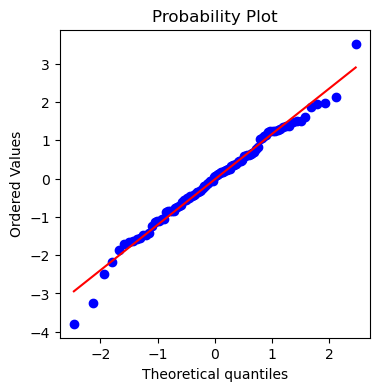

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.show()

## 2.7 긴 꼬리 분포

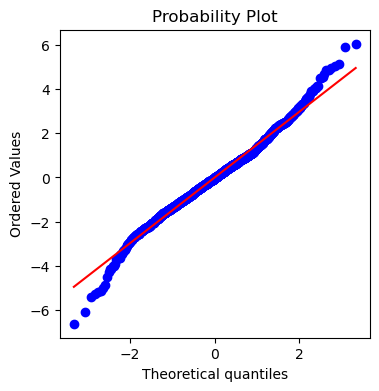

In [9]:
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.show()

## 2.9 이항분포

In [10]:
print(stats.binom.pmf(2, n=5, p=0.1))
print(stats.binom.cdf(2, n=5, p=0.1))

0.07289999999999992
0.99144


## 2.10 카이제곱분포

## 2.11 F 분포

## 2.12 푸아송 분포와 그 외 관련 분포들

### 2.12.1 푸아송 분포

In [11]:
stats.poisson.rvs(2, size=100)

array([0, 1, 2, 2, 2, 0, 2, 2, 4, 4, 1, 4, 1, 1, 4, 4, 2, 3, 1, 2, 3, 5,
       5, 2, 4, 2, 4, 0, 4, 1, 2, 3, 2, 2, 2, 0, 2, 1, 1, 0, 3, 1, 2, 6,
       1, 1, 3, 3, 0, 4, 0, 4, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 5, 4,
       3, 2, 2, 2, 1, 1, 2, 3, 2, 3, 2, 1, 2, 2, 3, 3, 1, 2, 1, 2, 3, 6,
       1, 2, 3, 1, 2, 4, 0, 0, 2, 3, 0, 2], dtype=int64)

### 2.12.2 지수분포

In [12]:
stats.expon.rvs(scale=0.2, size=100)
stats.expon.rvs(scale=5, size=100)

array([ 0.44701975,  1.5294005 ,  4.84907141, 16.1989046 , 16.93165509,
        0.47161731,  8.39158405,  5.10066051,  7.88942654,  2.34853318,
       18.28995181,  0.06088326,  5.41386475,  0.37269069, 11.98701878,
        0.51327695,  1.94162401,  2.67973182,  2.60183738,  6.40767589,
       13.57374051,  3.0300997 ,  5.72149338,  0.49116725,  2.83907156,
        4.02252595,  4.07403835,  0.32247141, 19.39942753,  1.26530022,
        0.70846803,  2.10698125,  7.37210319,  0.30733507,  2.67213754,
        4.43528404,  2.41042098,  9.49387238,  5.59917391,  5.79515832,
        7.34618985,  2.63685288,  0.14794695,  2.22093043, 11.58586186,
        4.31570076,  3.73840118, 13.16832073,  2.89033739,  3.31147522,
       12.88323771,  0.70533489,  7.36259348,  3.47873002,  8.97727271,
        1.69895345,  4.56045711,  3.99789159,  1.8555333 ,  0.91823926,
        8.63327902,  0.39372611,  0.71213074,  1.13155104,  2.37687601,
        5.57321786,  7.17910172,  5.37835158,  0.84550036,  4.26

### 2.12.3 고장률 추정

### 2.12.4 베이불 분포

In [13]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 3237.0107944 ,  2693.90698046,  1460.00528892,  2721.14483215,
        1260.36053883,  1862.92830087,  3236.22617508,  2533.09736051,
        2643.28042212,  4424.94475131,  1809.08437742,  7486.15659719,
       17476.6240216 ,  7573.26880094,  4400.34177791,  2723.66021371,
         727.93364547,  3148.78275417,  7263.53124144,  3208.63915451,
        7165.53943837,  3510.74790398,  3415.53025379,   808.60862846,
        1971.08217481,  3479.40575882,  7263.07427253,  1280.19055307,
        2054.28829399,  1969.60597044,  2121.81166853,  7164.28281888,
        2014.72682859,  7218.62264842,  9542.41861935,  5640.57991868,
        7594.66598715,  3680.68432264,  1644.38520478,  3449.03497548,
        4788.51803895,  6515.62723156,  1314.40244097,  2156.56070848,
        5224.01233799,  5227.94679738,   433.1759528 ,  1129.29866918,
        1201.62540428,  9189.63383275,  3722.18060834,  4009.65581442,
       12385.30876671,  5857.26084309,  7280.02141401,  4453.03169182,
      